# 공개되어 있는 데이터를 가지고 로지스틱 회귀 진행 실습

- 각 이미지 크기는 28 x 28 / 흑백 이미지 / 총 10개의 클래스

In [1]:
"""
Fashion-MNIST 라벨 구성 요소
0 - 티셔츠 
1 - 바지
2 - 스웨터 
3 - 드레스 
4 - 코트 
5 - 샌들 
6 - 셔츠 
7 - 운동화 
8 - 가방
9 - 앵글 부츠 
"""

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

### 데이터셋 다운로드 하고 Dataloader 생성하기

In [8]:
# 데이터셋 다운로드 및 Dataloader 생성 
train_dataset = dataset.FashionMNIST(root="./data", train=True, transform=transforms.ToTensor(),download=False)
test_dataset = dataset.FashionMNIST(root="./data", train=False, transform=transforms.ToTensor(),download=False)

# train Loader test Loader 설정 
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size = 100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size = 16, shuffle=False)

### 모델 정의

In [3]:
class LogisticRegression(nn.Module) : 
    def __init__(self, input_size, num_classes) : 
        super(LogisticRegression, self).__init__() 
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, x) : 
        out = self.linear(x)
        return out

### 하이퍼 파라미터 설정 

In [4]:
input_size = 28 * 28
num_classes = 10
num_epochs = 10
lr = 0.001

total_step = len(train_loader)

### 모델, Loss, 옵티마이저 정의

In [5]:
model = LogisticRegression(input_size=input_size, num_classes=num_classes)
# print(model)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

# device setting 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using Device >>" , device)

model.to(device)

Using Device >> cpu


LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

### train loop

Epoch [1/10], Step [100/600], Loss : 1.3121, Train ACC : 0.6600
Epoch [1/10], Step [200/600], Loss : 1.1131, Train ACC : 0.6600
Epoch [1/10], Step [300/600], Loss : 0.9796, Train ACC : 0.6700
Epoch [1/10], Step [400/600], Loss : 0.9041, Train ACC : 0.6800
Epoch [1/10], Step [500/600], Loss : 0.8505, Train ACC : 0.6840
Epoch [1/10], Step [600/600], Loss : 0.8857, Train ACC : 0.6883
Epoch [2/10], Step [100/600], Loss : 0.6817, Train ACC : 0.7700
Epoch [2/10], Step [200/600], Loss : 0.6087, Train ACC : 0.8150
Epoch [2/10], Step [300/600], Loss : 0.7133, Train ACC : 0.8133
Epoch [2/10], Step [400/600], Loss : 0.7571, Train ACC : 0.7875
Epoch [2/10], Step [500/600], Loss : 0.6870, Train ACC : 0.7800
Epoch [2/10], Step [600/600], Loss : 0.6226, Train ACC : 0.7850
Epoch [3/10], Step [100/600], Loss : 0.6304, Train ACC : 0.8000
Epoch [3/10], Step [200/600], Loss : 0.7477, Train ACC : 0.7950
Epoch [3/10], Step [300/600], Loss : 0.6929, Train ACC : 0.7933
Epoch [3/10], Step [400/600], Loss : 0.6

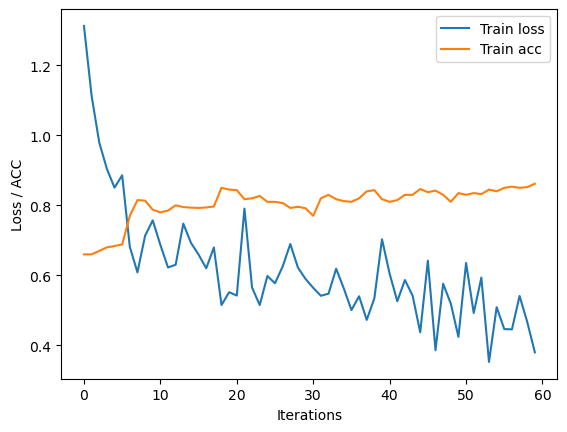

In [6]:
loss_list = []
acc_list = []

for epoch in range(num_epochs) :
    correct = 0
    total = 0 
    for i, (images, labels) in enumerate(train_loader) : 
        # 데이터 로드 
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        # 순전파 및 Loss 계산 
        ouptuts = model(images)
        loss = criterion(ouptuts, labels)
        
        # 역전파 및 가중치 업데이트 
        loss.backward()
        optimizer.step()
        
        # 로그 출력 
        if (i+1) % 100 == 0 :
            loss_list.append(loss.item())
            _, predicted = torch.max(ouptuts.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            acc_list.append(correct / total)
            
            print("Epoch [{}/{}], Step [{}/{}], Loss : {:.4f}, Train ACC : {:.4f}".format(
                epoch+1, num_epochs, i+1, total_step, loss.item(), acc_list[-1]))
            
            
# 손실 및 정확도 그래프 출력 
plt.plot(loss_list, label="Train loss")
plt.plot(acc_list, label="Train acc")
plt.xlabel('Iterations')
plt.ylabel('Loss / ACC')
plt.legend()
plt.show()

### 테스트 시각화

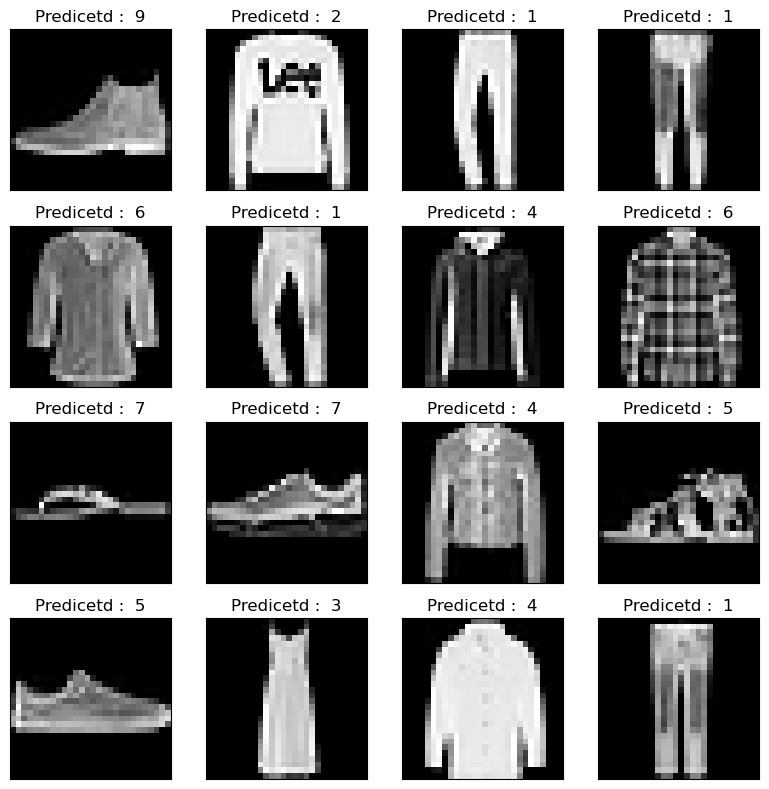

In [9]:
import numpy as np

# test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size = 100, shuffle=False)
"""
batch_size 만큼 이미지가 넘어옴 16이상 으로 설정
"""

# 테스트 이미지 가져오기 
dataiter = iter(test_loader)
images, labels = dataiter.__next__()
images = images.reshape(-1, 28 * 28)

# 모델 예측 
model.eval()
outputs_temp = model(images)
_, predicted_test = torch.max(outputs_temp.data,1)

# 이미지와 예측값 시각화 
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8,8), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat) : 
    ax.imshow(np.squeeze(images[i].reshape(28,28)), cmap='gray')
    ax.set_title(f"Predicetd :  {predicted_test[i].item()}")
    
plt.tight_layout()
plt.show()